# `-` U-Net 정리

## 1. U-net 의 목적
### `-` 이미지세그멘테이션 : 픽셀단위로 끊어서 분류하는 문제 
   - 어떤 범주인지 예측하도록 신경망 학습 필요

---
## `-` U-net 의 특징 정리
##### - 1 합성곱으로 압축된 정보는 **업샘플링**을 이용해 복원합니다.
##### - 2 정보의 압축(인코더)과 복원(디코더)을 이용한 구조를 **인코더-디코더 구조**라고 합니다.
##### - 3 U-Net은 인코더 디코더 구조를 이용한 모델로, 인코더의 출력과 디코더의 출력을 합쳐서 다음 층의 입력으로 사용합니다.
---

## `-` U-net 의 출력값
`-1` 인코더와 디코더 구조로 이 때의 출력값은 **픽셀값은 RGB값이 아닌 `클래스에 대한 예측 정보`입니다.**

>

>

## 2. U-net 의 구조

<img src="U-net 예시사진.png" width="500" height="5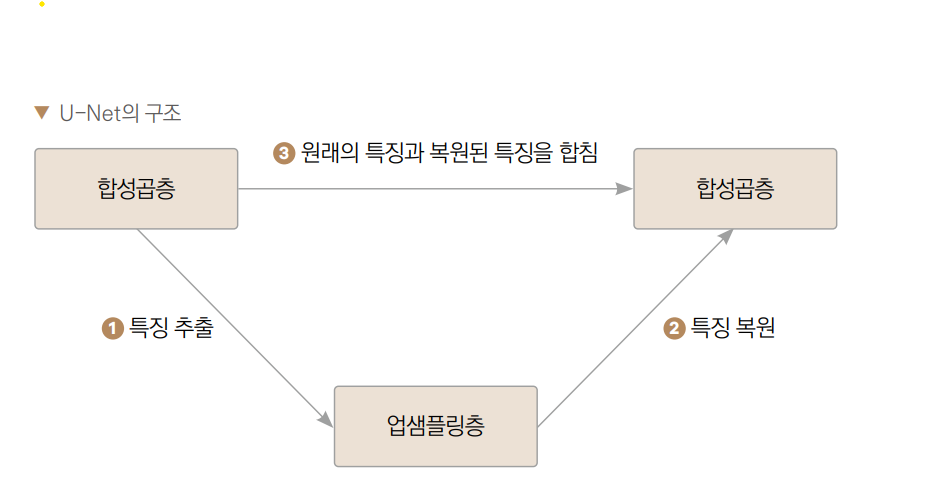00">

1. 특징추출 : 크기를 줄이면서 이미지를 합성곱을 실시 (이미지가 작아짐,정보가 압축됨) [인코더]
2. 특징복원 : 크기 커지면서 복원 (입력과 같은 크기의 출력을 가짐) [디코더]
3. 원래특징과 복원된 특징 합치기 : 특징이 합쳐짐.

---
**`-` 합성곱과 업샘플링의 차이**

**합성곱** : 커널의 가중치가 이미지의 픽셀에 곱해져서 하나의 출력을 계산합니다.

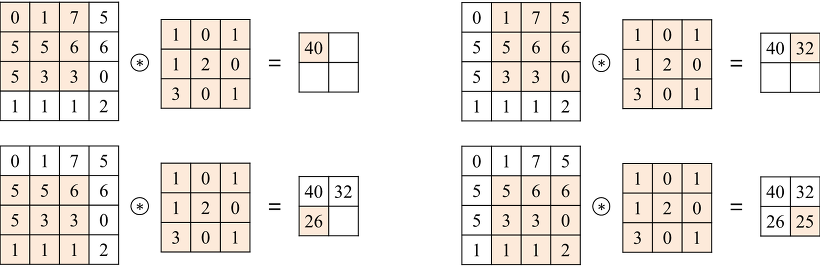img1.daumcdn.png](attachment:cf3b60d1-2fd9-47e7-8d63-04ad4e7cafee.png)
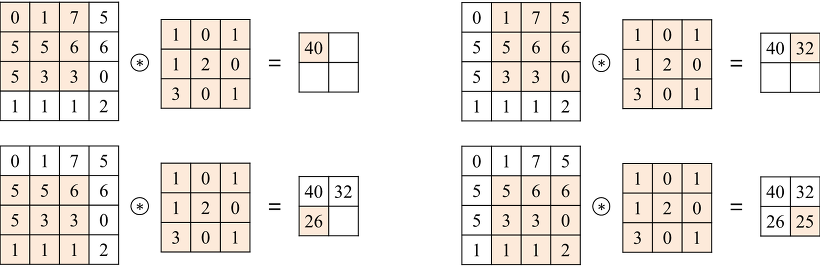

**업샘플링** : 하나의 픽셀이 커널의 가중치와 곱해져 출력을 계산합니다

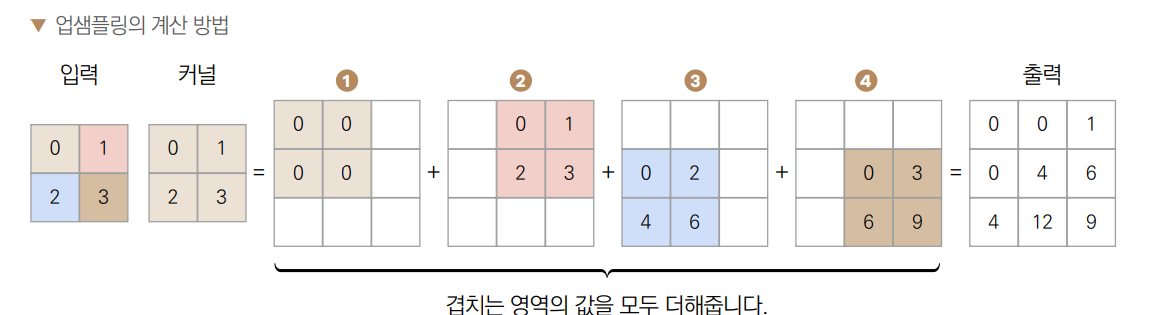

#### 계산법 알려주자면 `입력` 의 데이터를 뒤 커널의 가중치에 맞춤. 커널1개당 `입력` 전체가 들어가서 커널의 숫자만큼 곱하기취합니다.

<br>

---
## U-Net 모델 정의하기
---

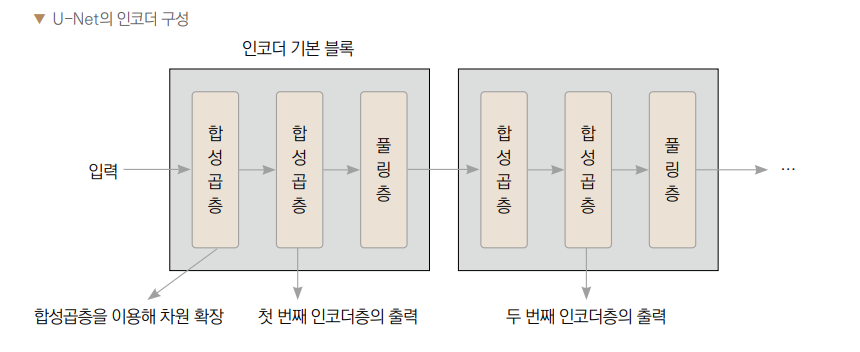

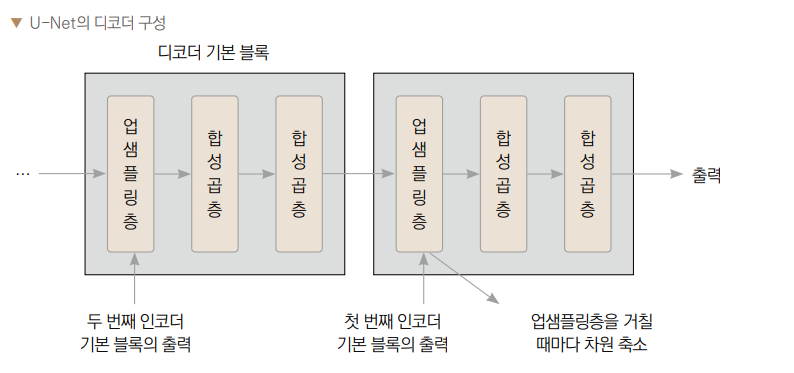

`-` 기본진행 : 인코더 후 디코더 진행 <br>
`-` 중요사항 : 
```
    마지막 디코더 <- 첫 번째 인코더 기본 블록의 출력 
    뒤에서 2번째 디코더 <- 2 번째 인코더의 기본 블록의 출력
    뒤에서 3번째 디코더 <- 3 번째 인코더의 기본 블록의 출력
    ...
    첫번째 디코더 <- 마지막 인코더 기본 블록의 출력
```
    이렇게 모두를 받아야함

`-` 마지막 출력층 : 마지막 합성곱은 신경망의 출력을 결정

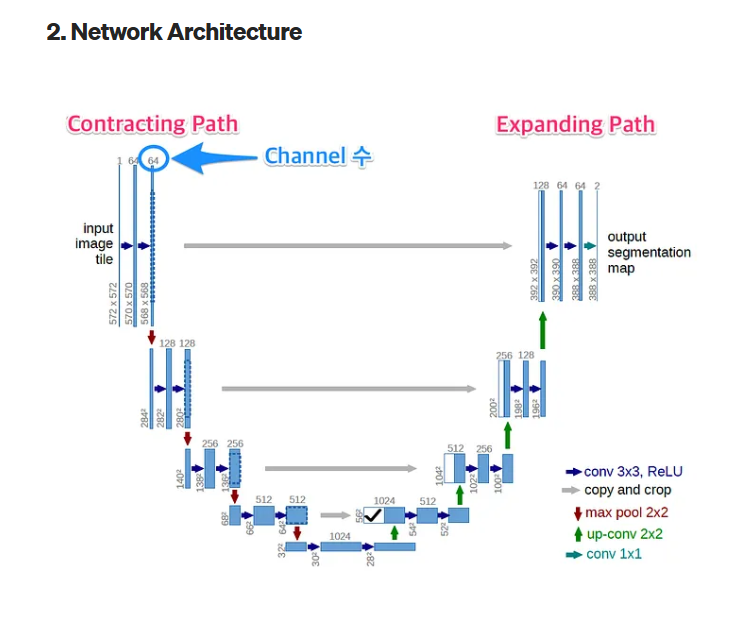

마지막 Final Layer에서는 1X1 convolution을 사용하여 2개의 클래스로 분류합니다. + softmax 로 분류


## `-` 1x1 Convolution 의 의미
- 3*10*10 의 이미지가 있다.(`3` : ` 채널3개 ` , `10*10` : `이미지크디`) => 1*1 Convolution 은 kernel 이 3*1*1 이다. (kernel 에서 각자의  가중치가 있다.)
- 결과값은 3*10*10 이다.
- 무슨의미 : kernel 이 1*1 이면 w * x = wx 가 그냥 이루어지는 것이다.
- 따라서 : 1번째 채널의 (1,1) * w1(커널가중치) + 2번째 채널의(1,1) * w2(커널가중치) + 3번쨰 채널의 (1,1) * w3(커널가중치) , ...(총 10x10 이니 100번진행)  이렇게 모두 더한 다음에 합치면 하나의 1*10*10 이 나온다면 채널이 3개인 1개의 필터를 쓴 것입니다.
- 결론 : 크기가 똑같지만 커널의 가중치를 곱한 것으로 순전파,역전파로 잘 학습된 가중치로 분류에 직접적인 영향 주기.


- 예시 : 
outputs = Conv2D(4, (1, 1), activation='sigmoid') (c9)
<br>
뜻 : 마지막 output 에 4개의 채널인 (1x1) 커널을 convolution 으로 하고 sigmoid 로 0과1분류하라는 의미

<br>
`-` 필터가 1개 일 떄 Convolution <br>
3x3x3 이미지 * 3x2x2 필터(필터의 채널이3개) -> 결론 : 2x2<br>
<br>
`-` 필터가 여러개 일 때 Convolution <br>
3x3x3 이미지 * 3x2x2 필터가 4개(4x3x2x2) -> 결론 : 2x2x4 <br>


# 결론 : 그래서 U-Net 의 아웃풋은 뭘로 나오는데?

- 이미지가 나온다.

`-` 예시 : kaggle 의 한 대회에서 철의 경함 조사하는 대회가 있었다.
`-` 여기서 철강의 이상부분을 다르게 발견하여 그림을 추출하였다.

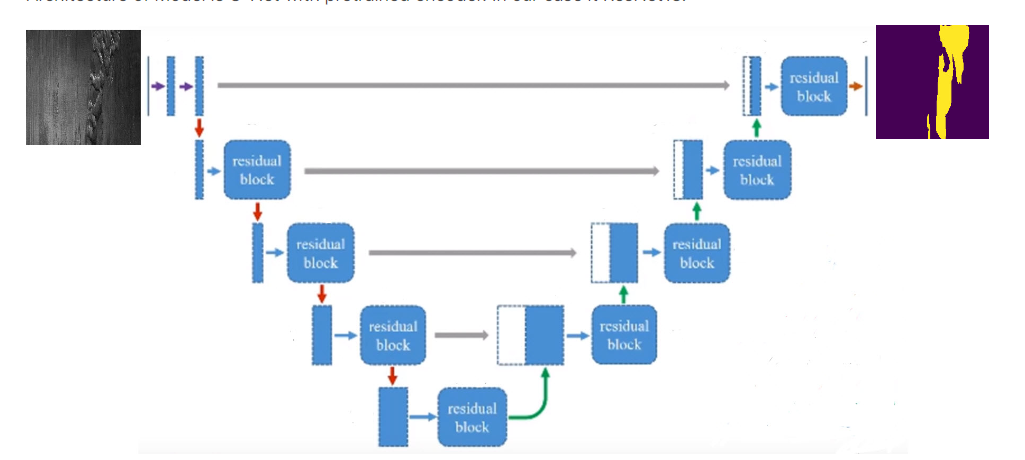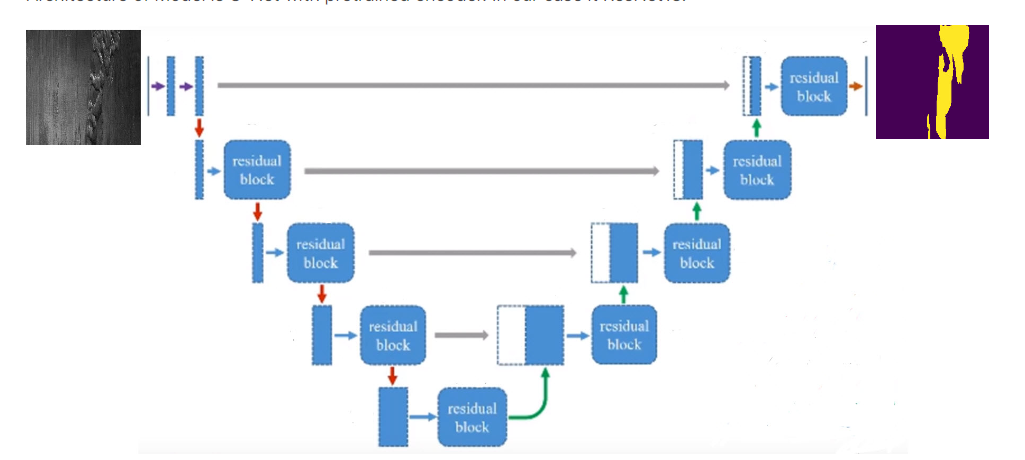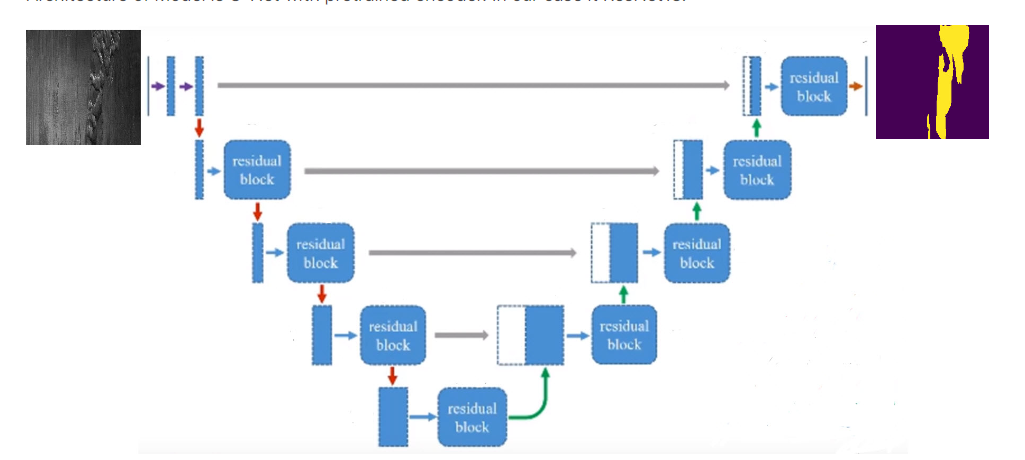

# 시사 : 이제 이 그림 이용해서 분류를 해야한다.

- 각자 competition 에 맞게 이 후 그림을 전처리하고 뭔가를 진행하는 줄 알았지만 퍼즐대회내에서는 finals 라는 conv 만들어서 퍼즐맞추기까지 진행함.

- 더 공부할 수 있는 자료
- https://www.kaggle.com/code/amanooo/defect-detection-starter-u-net/notebook 
- https://www.kaggle.com/competitions/severstal-steel-defect-detection/code?competitionId=14241&searchQuery=U-net
- https://medium.com/@eunsook/u-net-%EB%85%BC%EB%AC%B8-b84e17d6378e
- 텐초책